In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the data collected on Orfeo
serial_data = pd.read_csv("./Results/serial_mandelbrot_1000x1000x65535.csv")
#omp_strong_scaling_spread_data = pd.read_csv("./Results/omp_scaling_mandelbrot_3000x3000x3000_spread_cores.csv")
omp_strong_scaling_close_data = pd.read_csv("./Results/omp_scaling_mandelbrot_1000x1000x65535_close_cores.csv")
mpi_strong_scaling_core_data = pd.read_csv("./Results/mpi_scaling_mandelbrot_1000x1000x65535_core.csv")

# Convert the "n_processes", "n_threads", "Average time, "Standard deviation" and "Communication time" columns to numeric
serial_data["n_processes"] = serial_data["n_processes"].astype(int)
serial_data["n_threads"] = serial_data["n_threads"].astype(int)
serial_data["Average time"] = serial_data["Average time"].astype(float)
serial_data["Standard deviation"] = serial_data["Standard deviation"].astype(float)
serial_data["Communication time"] = serial_data["Communication time"].astype(float)
#omp_strong_scaling_spread_data["n_processes"] = omp_strong_scaling_spread_data["n_processes"].astype(int)
#omp_strong_scaling_spread_data["n_threads"] = omp_strong_scaling_spread_data["n_threads"].astype(int)
#omp_strong_scaling_spread_data["Average time"] = omp_strong_scaling_spread_data["Average time"].astype(float)
#omp_strong_scaling_spread_data["Standard deviation"] = omp_strong_scaling_spread_data["Standard deviation"].astype(float)
#omp_strong_scaling_spread_data["Communication time"] = omp_strong_scaling_spread_data["Communication time"].astype(float)
omp_strong_scaling_close_data["n_processes"] = omp_strong_scaling_close_data["n_processes"].astype(int)
omp_strong_scaling_close_data["n_threads"] = omp_strong_scaling_close_data["n_threads"].astype(int)
omp_strong_scaling_close_data["Average time"] = omp_strong_scaling_close_data["Average time"].astype(float)
omp_strong_scaling_close_data["Standard deviation"] = omp_strong_scaling_close_data["Standard deviation"].astype(float)
omp_strong_scaling_close_data["Communication time"] = omp_strong_scaling_close_data["Communication time"].astype(float)
mpi_strong_scaling_core_data["n_processes"] = mpi_strong_scaling_core_data["n_processes"].astype(int)
mpi_strong_scaling_core_data["n_threads"] = mpi_strong_scaling_core_data["n_threads"].astype(int)
mpi_strong_scaling_core_data["Average time"] = mpi_strong_scaling_core_data["Average time"].astype(float)
mpi_strong_scaling_core_data["Standard deviation"] = mpi_strong_scaling_core_data["Standard deviation"].astype(float)
mpi_strong_scaling_core_data["Communication time"] = mpi_strong_scaling_core_data["Communication time"].astype(float)

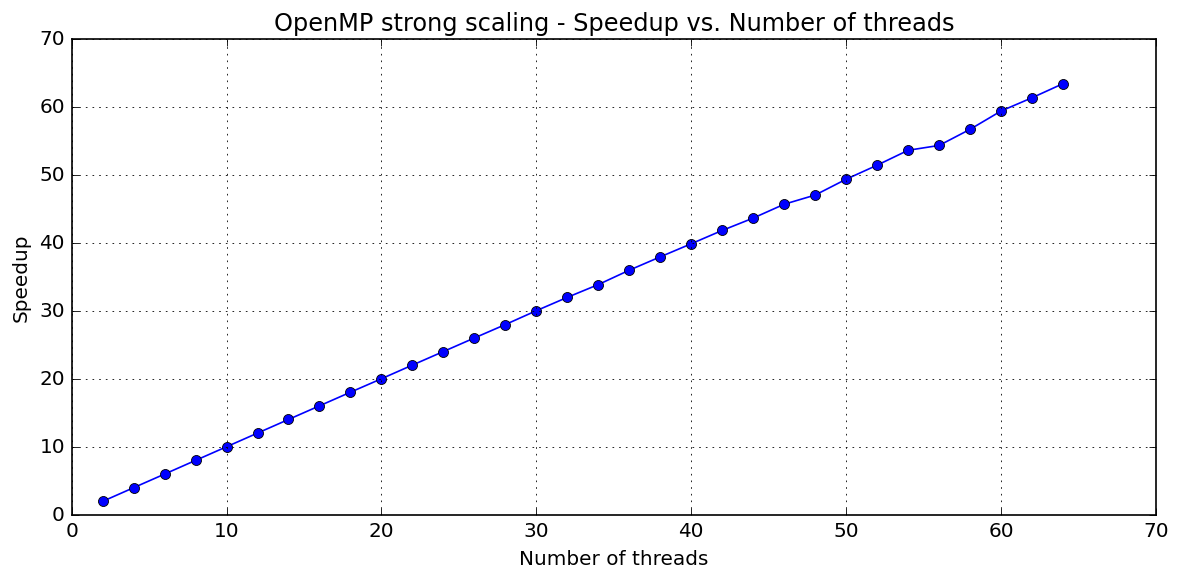

In [5]:
# Compute the speedup for the OpenMP spread and close scaling
#omp_strong_scaling_spread_data["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_spread_data["Average time"]
omp_strong_scaling_close_data["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_close_data["Average time"]

# Compute the speedup for the MPI scaling
mpi_strong_scaling_core_data["Speedup"] = serial_data["Average time"][0] / mpi_strong_scaling_core_data["Average time"]

# Plot the speedup for the OpenMP spread and close scaling
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
#plt.plot(omp_strong_scaling_spread_data["n_threads"], omp_strong_scaling_spread_data["Speedup"], marker="o", linestyle="-", color="blue") # label="Spread"
plt.plot(omp_strong_scaling_close_data["n_threads"], omp_strong_scaling_close_data["Speedup"], marker="o", linestyle="-", color="blue") # label="Close"
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
plt.title("OpenMP strong scaling - Speedup vs. Number of threads")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

In [6]:
# Compute the efficiency for the OpenMP spread and close scaling
#omp_strong_scaling_spread_data["Efficiency"] = omp_strong_scaling_spread_data["Speedup"] / omp_strong_scaling_spread_data["n_threads"]
omp_strong_scaling_close_data["Efficiency"] = omp_strong_scaling_close_data["Speedup"] / omp_strong_scaling_close_data["n_threads"]

# Compute the efficiency mean value for the OpenMP spread and close scaling
#omp_strong_scaling_spread_efficiency_mean = np.mean(omp_strong_scaling_spread_data["Efficiency"])
omp_strong_scaling_close_efficiency_mean = np.mean(omp_strong_scaling_close_data["Efficiency"])

# Print the efficiency mean value for the OpenMP spread and close scaling
#print("OpenMP spread efficiency mean value: ", omp_strong_scaling_spread_efficiency_mean)
print("OpenMP close efficiency mean value: ", omp_strong_scaling_close_efficiency_mean)

OpenMP close efficiency mean value:  0.9954143040584118


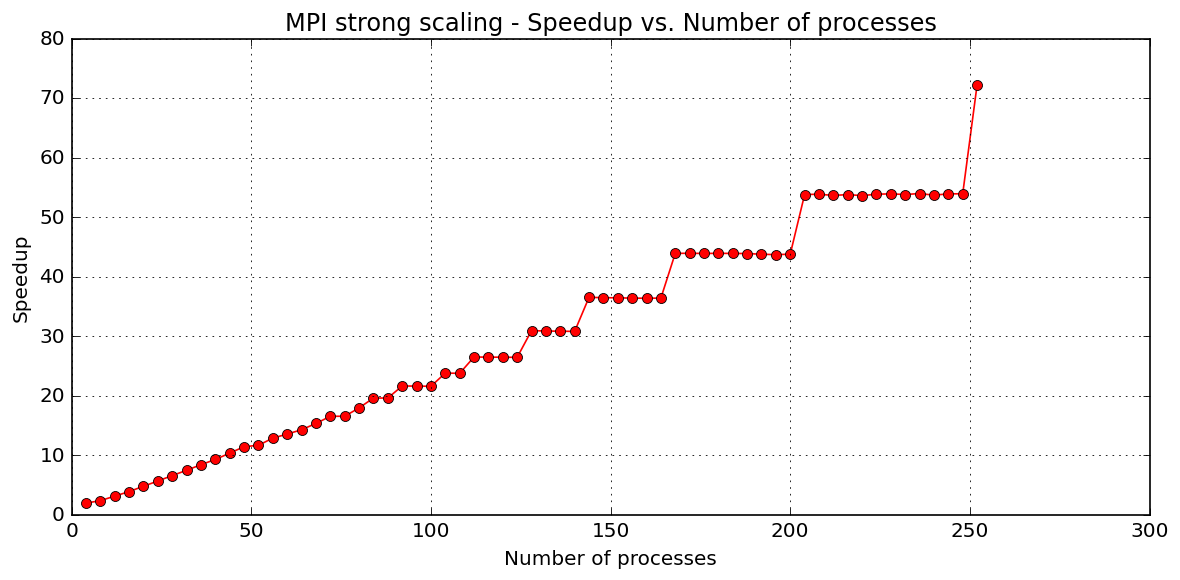

In [7]:
# Plot the speedup for the MPI scaling
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Speedup"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.title("MPI strong scaling - Speedup vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

In [8]:
# Compute the efficiency for the MPI scaling
mpi_strong_scaling_core_data["Efficiency"] = mpi_strong_scaling_core_data["Speedup"] / mpi_strong_scaling_core_data["n_processes"]

# Compute the efficiency mean value for the MPI scaling
mpi_strong_scaling_core_efficiency_mean = np.mean(mpi_strong_scaling_core_data["Efficiency"])

# Print the efficiency mean value for the MPI scaling
print("MPI core efficiency mean value: ", mpi_strong_scaling_core_efficiency_mean)

MPI core efficiency mean value:  0.24041298407845318


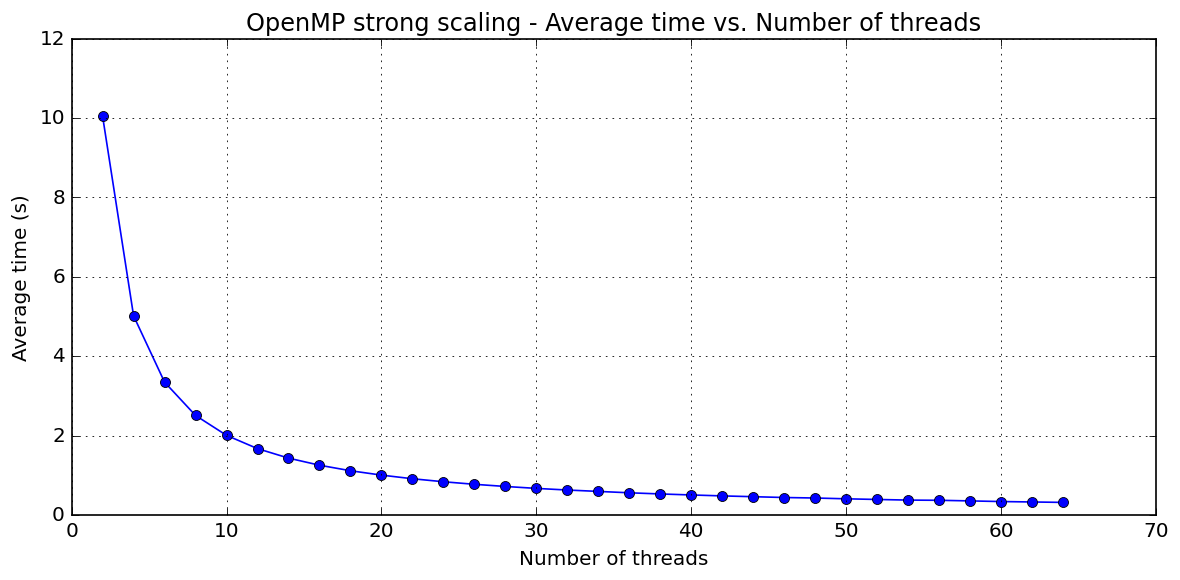

In [9]:
# Plot the OpenMP spread and close strong scaling using the average time and plotting also the standard deviation
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
#plt.errorbar(omp_strong_scaling_spread_data["n_threads"], omp_strong_scaling_spread_data["Average time"], yerr=omp_strong_scaling_spread_data["Standard deviation"], marker="o", linestyle="-", color="blue") # label="Spread"
plt.errorbar(omp_strong_scaling_close_data["n_threads"], omp_strong_scaling_close_data["Average time"], yerr=omp_strong_scaling_close_data["Standard deviation"], marker="o", linestyle="-", color="blue") # label="Close"
plt.xlabel("Number of threads")
plt.ylabel("Average time (s)")
plt.title("OpenMP strong scaling - Average time vs. Number of threads")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

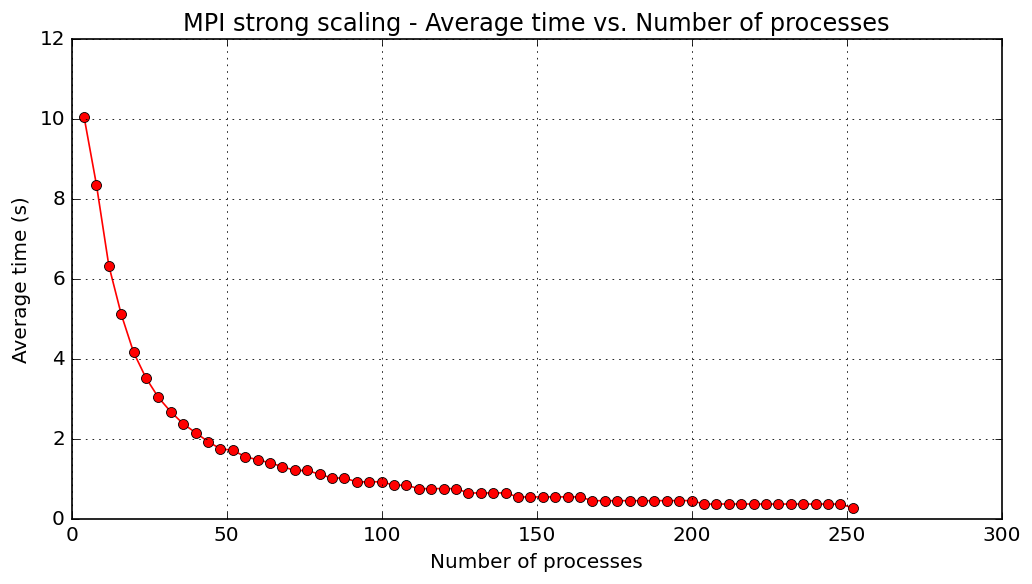

In [10]:
# Plot the MPI strong scaling using the average time and plotting also the standard deviation
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.errorbar(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Average time"], yerr=mpi_strong_scaling_core_data["Standard deviation"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Average time (s)")
plt.title("MPI strong scaling - Average time vs. Number of processes")
#plt.legend()
plt.grid(True)

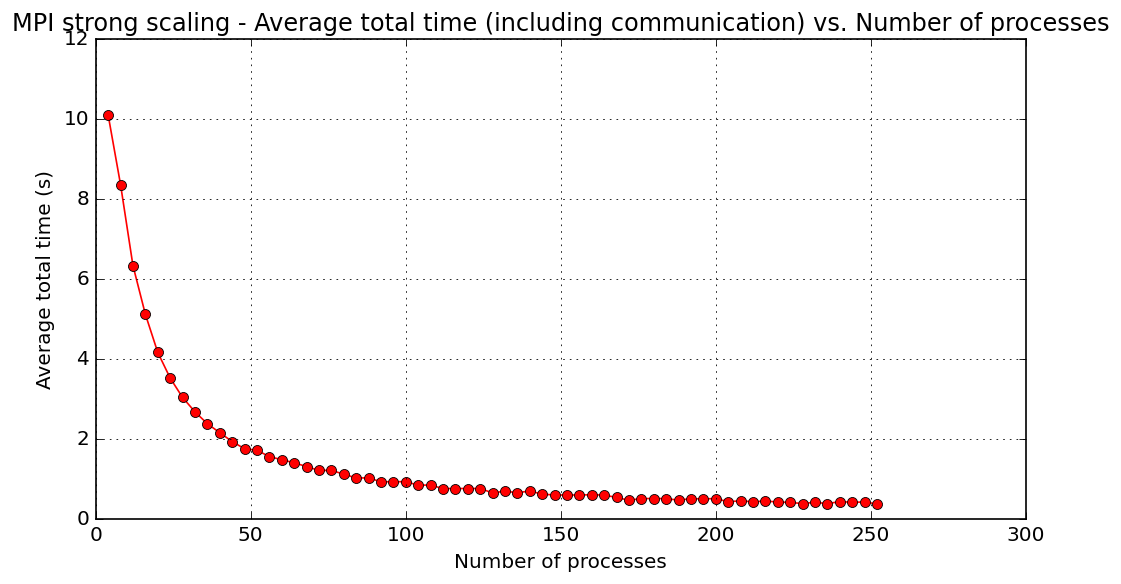

In [11]:
# Add a new column for the mpi_strong_scaling_core_data dataframe to store the
# total time (average time + communication time)
mpi_strong_scaling_core_data["Total time"] = mpi_strong_scaling_core_data["Average time"] + mpi_strong_scaling_core_data["Communication time"]

# Plot the MPI strong scaling using the total time
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Total time"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Average total time (s)")
plt.title("MPI strong scaling - Average total time (including communication) vs. Number of processes")
#plt.legend()
plt.grid(True)

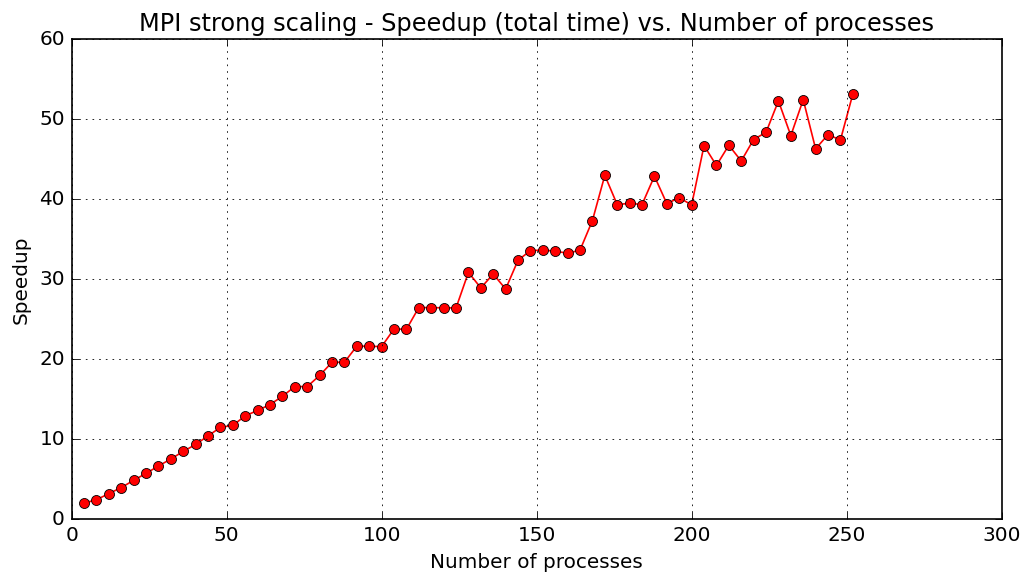

In [14]:
# Compute the speedup for the MPI scaling using the total time (average time + communication time)
mpi_strong_scaling_core_data["Speedup"] = serial_data["Average time"][0] / mpi_strong_scaling_core_data["Total time"]

# Plot the speedup for the MPI scaling using the total time (average time + communication time)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Speedup"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.title("MPI strong scaling - Speedup (total time) vs. Number of processes")
#plt.legend()
plt.grid(True)

In [15]:
# Compute the efficiency for the MPI scaling using the total time
mpi_strong_scaling_core_data["Efficiency"] = mpi_strong_scaling_core_data["Speedup"] / mpi_strong_scaling_core_data["n_processes"]

# Compute the efficiency mean value for the MPI scaling using the total time
mpi_strong_scaling_core_efficiency_mean = np.mean(mpi_strong_scaling_core_data["Efficiency"])

# Print the efficiency mean value for the MPI scaling using the total time
print("MPI core efficiency mean value (total time): ", mpi_strong_scaling_core_efficiency_mean)


MPI core efficiency mean value (total time):  0.22826833793854592
